In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Auction_master_train.csv',encoding ='UTF-8') 

In [3]:
pd.set_option('max_columns', 24,'max_rows', 20) 
# pd.set_option('display.max_rows', None)

In [4]:
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [5]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,...,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,...,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,...,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,...,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,...,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,...,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


# 1. 데이터 전처리 및 EDA

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

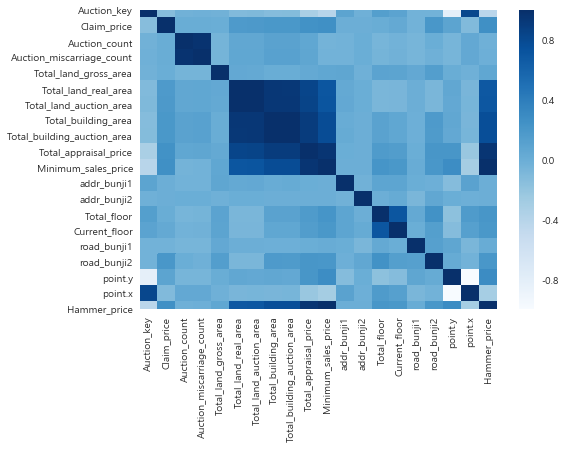

In [6]:
#데이터들 간 상관관계를 히트맵으로 확인
sns.heatmap(df.corr(),cmap='Blues')
plt.show()

## 1-1. 결측값이 있는 모든 열 제거

In [7]:
#데이터 타입과 결측값이 있는 열 확인
# df.info()
df.isnull().sum(axis=0)

Auction_key          0
Auction_class        0
Bid_class            0
Claim_price          0
Appraisal_company    0
                    ..
Close_date           0
Close_result         0
point.y              0
point.x              0
Hammer_price         0
Length: 41, dtype: int64

In [8]:
df.shape #원래 차원 확인

(1933, 41)

In [9]:
df.dropna(axis=1, inplace = True) # 결측치가 있는 열 제거한 후 데이터에 적용

Drop 된 변수
1. addr_li
2. addr_bunji1
3. addr_bunji2
4. Specific
5. road_bunji1
6. road_bunji2  
모두 분석과는 관련 없는 String 변수들이다.

In [10]:
df.shape #결측치가 있는 열을 제거하고 난 이후의 shape, 위에서와 같이 6개가 제거된 것을 볼 수 있음.

(1933, 35)

## 1-2. Hammer_Price 이상치 제거

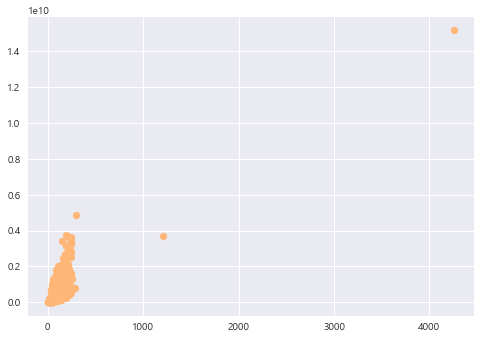

In [11]:
#낙찰가 X 경매건물면적 산점도
plt.scatter(x='Total_building_auction_area',y='Hammer_price', data=df, color='#ffb677')
plt.show()

In [12]:
#원활한 분석을 위해 낙찰가의 이상치를 가진 row 삭제
df.query('Hammer_price > 10000000000')
#인덱스 확인

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,...,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Hammer_price
1521,10,강제,일괄,8955865567,대신감정,2015-05-21 00:00:00,4,3,0.0,2665.84,2665.84,4255.07,...,외11 하이파크 101동 1층 101호,아파트,1111-11-11 00:00:00,10,1,N,남현길,2017-04-14 00:00:00,배당,37.473014,126.974663,15151000000


In [13]:
#인덱스로 접근하여 이상치를 가진 row를 제거하고 바로 데이터에 적용
df.drop(1521, inplace=True)
df.shape #1933 -> 1932로 하나 삭제된 모습

(1932, 35)

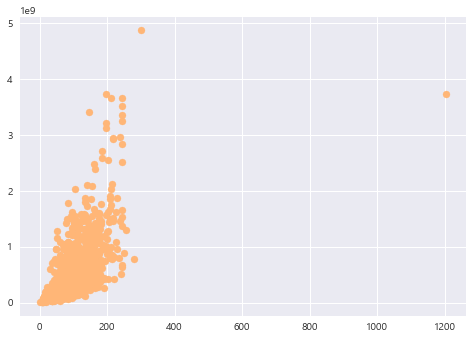

In [14]:
#다시 산점도 확인
plt.scatter(x='Total_building_auction_area',y='Hammer_price', data=df, color='#ffb677')

경매건물면적 데이터도 이상치가 존재하나 일단 Target변수만 처리하고 진행함

## 1-3. 모든 연속형 데이터의 분포 확인

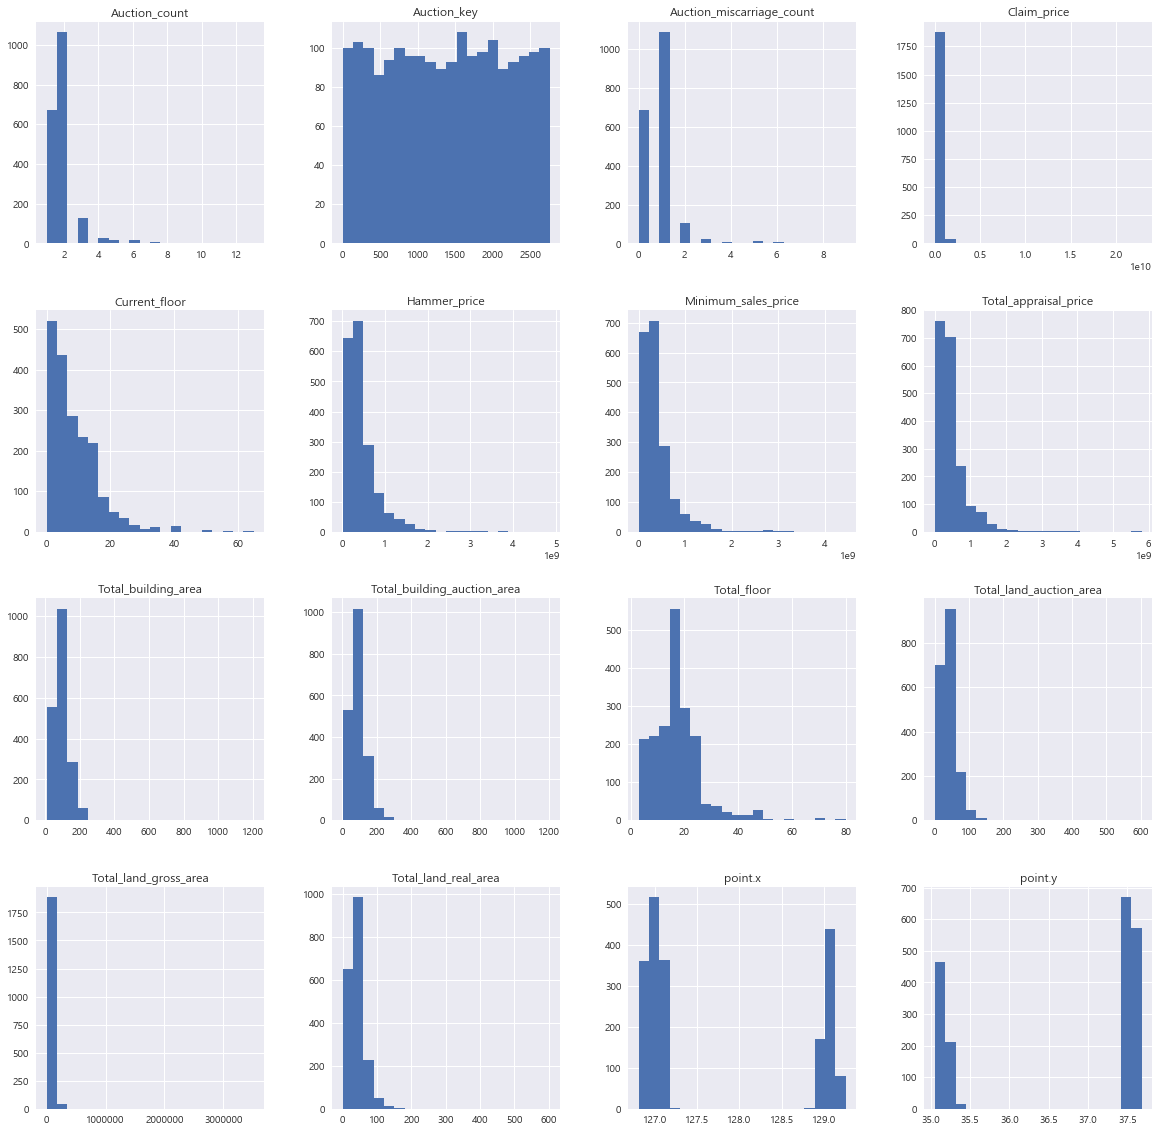

In [15]:
#대부분의 데이터가 고르게 분포되어 있지 않다. 
df.hist(bins=20,figsize=(20,20))
plt.show()

면적, 가격 변수의 경우 이상치로 판별할 수 있는 것들이 존재함   
눈여겨 볼 필요가 있다

### 1-4. 전체 중 각 명목형 데이터가 차지하는 비율 (Pie Chart)
명목형 데이터의 비율이 얼마인지 알아보고자 하였음

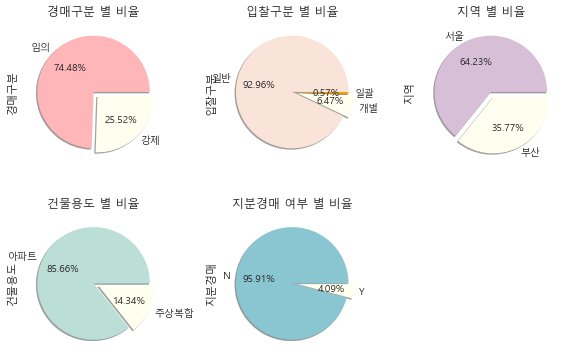

In [16]:
#1. 전체 경매건 중 경매구분 비율
plt.subplot(2,3,1)
Class_count = df['Auction_class'].value_counts()
Class_count.plot.pie(explode=[0,0.1], autopct = '%1.2f%%', shadow=True, colors=['#ffb6b9', 'ivory'])
plt.ylabel('경매구분')
plt.title('경매구분 별 비율')

#2.전체 경매건 중 입찰구분 비율
plt.subplot(2,3,2)
Bid_count = df['Bid_class'].value_counts()
Bid_count.plot.pie(explode=[0,0.1,0], autopct='%1.2f%%', shadow=True, colors=['#fae3d9', 'ivory', 'orange'])
plt.ylabel('입찰구분')
plt.title('입찰구분 별 비율')

#3.전체 경매건 중 시/도 비율
plt.subplot(2,3,3)
Do_count = df['addr_do'].value_counts()
Do_count.plot.pie(explode=[0,0.1],autopct='%1.2f%%',shadow=True, colors =['thistle', 'ivory']) 
plt.ylabel('지역')
plt.title('지역 별 비율')

#4.전체 경매건 중 건물의 용도 비율
plt.subplot(2,3,4)
Use_count = df['Apartment_usage'].value_counts()
Use_count.plot.pie(explode=[0,0.1],autopct='%1.2f%%',shadow=True, colors=['#bbded6', 'ivory']) 
plt.ylabel('건물용도')
plt.title('건물용도 별 비율')

#5.전체 경매건 중 지분경매 여부 비율
plt.subplot(2,3,5)
Share_count = df['Share_auction_YorN'].value_counts()
Share_count.plot.pie(explode=[0,0.1],autopct='%1.2f%%',shadow=True, colors=['#8ac6d1', 'ivory']) 
plt.ylabel('지분경매')
plt.title('지분경매 여부 별 비율')

plt.tight_layout()
plt.show()

### 1-5. 데이터 셋을 Target / Feature로 나누기

In [17]:
#Target값과 Feature을 각각 데이터셋에 저장
Y = df.iloc[:, -1] #target
X = df.iloc[:, :-1] #feature

# 2. Encoding

### 2-1. 범주형 자료 인코딩

[참고자료]  
https://rfriend.tistory.com/tag/pd.get_dummies%28%29%20%EB%A5%BC%20%EC%9D%B4%EC%9A%A9%ED%95%B4%20%EA%B0%80%EB%B3%80%EC%88%98%28dummy%20var%29%20%EB%A7%8C%EB%93%A4%EA%B8%B0

### 1. Auction_class

In [18]:
def Encoding_class(x):
    if x == "임의":
        return 1
    else:
        return 0

X['Auction_class'] = df['Auction_class'].apply(Encoding_class)
#1이 임의 0이 강제

In [19]:
X.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,...,addr_san,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x
0,2687,1,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,...,N,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,N,해운대해변로,2018-06-14 00:00:00,배당,35.162717,129.137048
1,2577,1,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,...,N,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,N,마린시티2로,2017-03-30 00:00:00,배당,35.156633,129.145068
2,2197,1,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,...,N,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,N,모라로110번길,2017-12-13 00:00:00,배당,35.184601,128.996765
3,2642,1,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,...,N,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,N,황령대로319번가길,2017-12-27 00:00:00,배당,35.154180,129.089081
4,1958,0,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,...,N,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,N,오작로,2016-10-04 00:00:00,배당,35.099630,128.998874


### 2. Bid_class

In [20]:
bid_dummies = pd.get_dummies(df['Bid_class'], prefix='Bid', drop_first=True)
X = pd.concat([X,bid_dummies], axis=1)
X.drop('Bid_class', axis=1, inplace=True)
#(0,0)-개별 (0,1)-일반 (1,0)-일괄

In [21]:
X.head()

,Auction_key,Auction_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,...,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Bid_일괄,Bid_일반
0,2687,1,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,...,주상복합,2009-07-14 00:00:00,45,5,N,해운대해변로,2018-06-14 00:00:00,배당,35.162717,129.137048,0,0
1,2577,1,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,...,아파트,2011-12-16 00:00:00,70,51,N,마린시티2로,2017-03-30 00:00:00,배당,35.156633,129.145068,0,1
2,2197,1,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,...,아파트,1992-07-31 00:00:00,15,14,N,모라로110번길,2017-12-13 00:00:00,배당,35.184601,128.996765,0,0
3,2642,1,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,...,아파트,2001-07-13 00:00:00,20,11,N,황령대로319번가길,2017-12-27 00:00:00,배당,35.154180,129.089081,0,1
4,1958,0,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,...,아파트,2001-11-27 00:00:00,7,7,N,오작로,2016-10-04 00:00:00,배당,35.099630,128.998874,0,1


### 3. addr_do (시/도 구분)

In [22]:
def Encoding_do(x):
    if x == "서울":
        return 1
    else:
        return 0

In [23]:
X['addr_do'] = df['addr_do'].apply(Encoding_do)
#1이 서울, 0이 부산

### 4. Apartment_usage

In [24]:
def Encoding_usage(x):
    if x == "아파트":
        return 1
    else:
        return 0

In [25]:
X['Apartment_usage'] = df['Apartment_usage'].apply(Encoding_usage)
#1이 아파트 0이 주상복합

### 5. Share_auction_YorN

In [26]:
def Encoding_Share(x):
    if x == "Y":
        return 1
    else:
        return 0

In [27]:
X['Share_auction_YorN'] = df['Share_auction_YorN'].apply(Encoding_Share)
#지분경매Yes가 1, No가 0

In [28]:
X.head()

,Auction_key,Auction_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,...,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,road_name,Close_date,Close_result,point.y,point.x,Bid_일괄,Bid_일반
0,2687,1,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,...,0,2009-07-14 00:00:00,45,5,0,해운대해변로,2018-06-14 00:00:00,배당,35.162717,129.137048,0,0
1,2577,1,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,...,1,2011-12-16 00:00:00,70,51,0,마린시티2로,2017-03-30 00:00:00,배당,35.156633,129.145068,0,1
2,2197,1,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,...,1,1992-07-31 00:00:00,15,14,0,모라로110번길,2017-12-13 00:00:00,배당,35.184601,128.996765,0,0
3,2642,1,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,...,1,2001-07-13 00:00:00,20,11,0,황령대로319번가길,2017-12-27 00:00:00,배당,35.154180,129.089081,0,1
4,1958,0,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,...,1,2001-11-27 00:00:00,7,7,0,오작로,2016-10-04 00:00:00,배당,35.099630,128.998874,0,1


### C. 분석에 필요하지 않은 데이터 drop
경매키값, 감정사, 채권자, 시/도를 제외한 주소관련 변수, 종국결과 변수 제외
경매키값은 낙찰가에 영향을 주지 않으며 감정사, 채권자는 범주가 굉장히 다양하여 일단 제외,
주소관련 변수 또한 분석에 이용할 수 없으므로 제외

In [29]:
X.drop(['Auction_key', 'Appraisal_company', 'Final_result', 'Creditor', 'addr_si', 'addr_dong', 'addr_san', 'addr_etc', 'road_name', 'Close_result'], axis=1, inplace=True)

In [30]:
X.head()

,Auction_class,Claim_price,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,...,Final_auction_date,addr_do,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Share_auction_YorN,Close_date,point.y,point.x,Bid_일괄,Bid_일반
0,1,1766037301,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,...,2018-03-20 00:00:00,0,0,2009-07-14 00:00:00,45,5,0,2018-06-14 00:00:00,35.162717,129.137048,0,0
1,1,152946867,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,...,2017-02-02 00:00:00,0,1,2011-12-16 00:00:00,70,51,0,2017-03-30 00:00:00,35.156633,129.145068,0,1
2,1,11326510,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,...,2017-10-13 00:00:00,0,1,1992-07-31 00:00:00,15,14,0,2017-12-13 00:00:00,35.184601,128.996765,0,0
3,1,183581724,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,...,2017-11-02 00:00:00,0,1,2001-07-13 00:00:00,20,11,0,2017-12-27 00:00:00,35.154180,129.089081,0,1
4,0,45887671,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,...,2016-08-03 00:00:00,0,1,2001-11-27 00:00:00,7,7,0,2016-10-04 00:00:00,35.099630,128.998874,0,1


### D. 날짜 변수 추가
날짜변수는 EDA과제에서 진행한 날짜 관련 Feature로 대체하고 각 날짜 데이터는 drop하고 분석을 진행함

### 경매기간 (Auction_period)

In [31]:
#파이썬 날짜 데이터로 변환
df['First_auction_date_dt'] = pd.to_datetime(df['First_auction_date'])
df['Final_auction_date_dt'] = pd.to_datetime(df['Final_auction_date'])

#경매기간을 나타내는 변수 Auction_period 생성
X['Auction_period'] = (df['Final_auction_date_dt'] - df['First_auction_date_dt']).dt.days
X['Auction_period']

0        35
1        35
2        77
3       105
4        28
       ... 
1928      0
1929     28
1930     28
1931     35
1932     35
Name: Auction_period, Length: 1932, dtype: int64

### 연식 (Est_period)

In [32]:
#보존등기일(Preserve_regist_date) 변수는 '1111-11-11 00:00:00' 이라는 결측값 존재
#때문에 다른 변수들처럼 to-datetime으로 처리가 불가했음 (bound 초과)

#min()을 이용해 miss_date에 '1111-11-11 00:00:00' 데이터를 입력받음.
miss_date = df['Preserve_regist_date'].min()
miss_date

'1111-11-11 00:00:00'

In [33]:
df['Preserve_regist_date'].max()

'2017-06-12 00:00:00'

In [34]:
#replace로 해당 데이터 대치, inplace를 이용해 데이터에 즉시 반영
df['Preserve_regist_date'].replace(miss_date, "2020-01-01 00:00:00", inplace=True)

In [35]:
#이후 max값을 찍어본 결과 '2020-01-01 00:00:00' 출력 --> 정상적으로 처리
df['Preserve_regist_date'].max()

'2020-01-01 00:00:00'

In [36]:
#to_datetime을 이용해 변환, 새 변수에 저장
df['Preserve_regist_date_dt'] = pd.to_datetime(df['Preserve_regist_date'])

In [37]:
#연식을 나타내는 데이터 Est_Period 생성 후 분석에 사용할 Feature 데이터에 추가
X['Est_Period'] = (df['First_auction_date_dt'] - df['Preserve_regist_date_dt']).dt.days

In [38]:
#결측값을 평균값으로 대치하기 위해 평균 확인
mean_Est = X['Est_Period'].mean()
mean_Est

6354.163043478261

In [39]:
X['Est_Period'].mask(X['Est_Period']<0, mean_Est, inplace=True)
# X['Est_Period'][X['Est_Period'] < 0] = mean_Est

In [40]:
print(X['Est_Period'].min())
print(X['Est_Period'].mean())
#우와!! 값들이 바꼈다!!!

97.0
6526.935739040419


### 분기 (Est_period)

In [41]:
#분기 정보를 저장하는 변수 생성
#Final_auction_quarter : 경매가 끝나는 시점의 분기 데이터를 의미합니다
X['Final_auction_quarter'] = df['Final_auction_date_dt'].dt.quarter

### 날짜관련 변수 Drop 
날짜 관련 변수는 위의 경매기간, 연식, 경매분기 데이터로 사용할 것이기 때문에 나머지 변수는 드랍합니다.

In [42]:
X.drop(['Appraisal_date', 'First_auction_date', 'Final_auction_date', 'Preserve_regist_date', 'Close_date'], axis=1, inplace=True)

In [43]:
X.head()

,Auction_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_do,Apartment_usage,Total_floor,Current_floor,Share_auction_YorN,point.y,point.x,Bid_일괄,Bid_일반,Auction_period,Est_Period,Final_auction_quarter
0,1,1766037301,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,0,0,45,5,0,35.162717,129.137048,0,0,35,3136.0,1
1,1,152946867,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,0,1,70,51,0,35.156633,129.145068,0,1,35,1840.0,1
2,1,11326510,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,0,1,15,14,0,35.184601,128.996765,0,0,77,9128.0,4
3,1,183581724,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,0,1,20,11,0,35.154180,129.089081,0,1,105,5851.0,4
4,0,45887671,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,0,1,7,7,0,35.099630,128.998874,0,1,28,5335.0,3


In [44]:
X.columns

Index(['Auction_class', 'Claim_price', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'addr_do',
       'Apartment_usage', 'Total_floor', 'Current_floor', 'Share_auction_YorN',
       'point.y', 'point.x', 'Bid_일괄', 'Bid_일반', 'Auction_period',
       'Est_Period', 'Final_auction_quarter'],
      dtype='object')

# 3. Linear Regression Analysis

In [45]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [46]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#fit된 모델의 R-square
model.score(X_train, y_train)
#굉장히 좋은 설명력을 가지고 있다.

0.9870983372950599

In [48]:
#MSE :: 왜 이렇게 큰 값이 나오는지 모르겠다
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

2661265372099287.5

In [49]:
print(model.coef_) #추정된 회귀계수(intercept제외)
print(model.intercept_) #intercept

[-5.93756824e+06  3.23621972e-03 -2.55778113e+07  2.94747620e+07
  1.37792337e+01  4.36498871e+05 -1.57672472e+05 -9.82115331e+04
 -1.53110598e+05  2.16514629e-01  8.67243382e-01  3.34704221e+08
  1.04633239e+07  2.23080310e+05 -4.49906682e+05 -2.40364822e+07
 -8.64515773e+07  5.71637167e+07 -5.25670081e+06  1.42754336e+07
  2.09796806e+04  9.58732514e+02  5.21353293e+05]
-4329321074.117881


In [50]:
#test데이터 예측
# model.predict(X_test)

In [51]:
#test데이터 R-square
model.score(X_test, y_test)
#실제 데이터인데 이렇게 결정계수가 높게 나와요??

0.9885206792994438

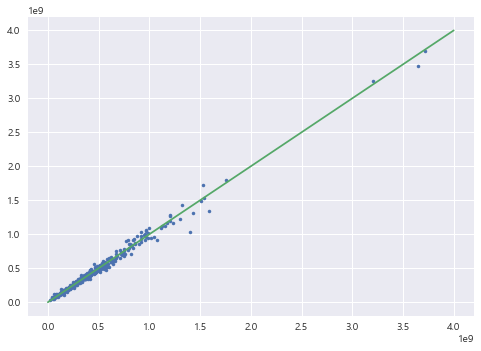

In [52]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 4000000000, 100)
y = x
plt.plot(x, y)
plt.show()

# 4. 행렬을 통해 <Beta, MSE> 구하기

## 4-1. Beta

In [53]:
from numpy.linalg import inv 

In [54]:
X.shape

(1932, 23)

In [55]:
Y.shape

(1932,)

In [56]:
X_t = np.transpose(X)
X_t.shape

(23, 1932)

In [57]:
X_t@X #23*23

,Auction_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_do,Apartment_usage,Total_floor,Current_floor,Share_auction_YorN,point.y,point.x,Bid_일괄,Bid_일반,Auction_period,Est_Period,Final_auction_quarter
Auction_class,1.439000e+03,5.916610e+11,2.591000e+03,1.087000e+03,5.342679e+07,6.120344e+04,6.063376e+04,1.399987e+05,1.386948e+05,7.362776e+11,6.209992e+11,9.380000e+02,1.272000e+03,2.515800e+04,1.279700e+04,2.400000e+01,5.283887e+04,1.837770e+05,7.000000e+00,1.369000e+03,8.984400e+04,9.043763e+06,3.661000e+03
Claim_price,5.916610e+11,3.643054e+21,1.310980e+12,5.707388e+11,2.568361e+16,3.687504e+13,3.649651e+13,8.654163e+13,8.563851e+13,6.137960e+20,5.096474e+20,5.752297e+11,6.103303e+11,1.247285e+13,7.203831e+12,1.396471e+10,2.622415e+13,9.004834e+13,7.658219e+09,4.839619e+11,5.963471e+13,4.643707e+15,1.748524e+12
Auction_count,2.591000e+03,1.310980e+12,8.201000e+03,4.253000e+03,1.149278e+08,1.470133e+05,1.434006e+05,3.458041e+05,3.373135e+05,1.755428e+12,1.384583e+12,2.230000e+03,2.965000e+03,5.932300e+04,3.086600e+04,1.520000e+02,1.299786e+05,4.529047e+05,2.400000e+01,3.214000e+03,3.894630e+05,2.239086e+07,8.826000e+03
Auction_miscarriage_count,1.087000e+03,5.707388e+11,4.253000e+03,2.529000e+03,4.505539e+07,6.381753e+04,6.225086e+04,1.543850e+05,1.504237e+05,7.727648e+11,5.639998e+11,9.330000e+02,1.234000e+03,2.515600e+04,1.315300e+04,7.000000e+01,5.570964e+04,1.943684e+05,1.200000e+01,1.338000e+03,2.331130e+05,9.232944e+06,3.705000e+03
Total_land_gross_area,5.342679e+07,2.568361e+16,1.149278e+08,4.505539e+07,1.953680e+13,3.423195e+09,3.337131e+09,6.783692e+09,6.615597e+09,3.926966e+16,3.394601e+16,4.440067e+07,6.563245e+07,1.309719e+09,7.280499e+08,2.712646e+06,2.456659e+09,8.537160e+09,4.774789e+05,6.461513e+07,3.701702e+09,4.457325e+11,1.649280e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bid_일괄,7.000000e+00,7.658219e+09,2.400000e+01,1.200000e+01,4.774789e+05,1.391750e+03,1.391750e+03,2.626990e+03,2.626990e+03,2.127905e+10,1.524889e+10,8.000000e+00,8.000000e+00,1.660000e+02,1.110000e+02,0.000000e+00,4.056725e+02,1.403028e+03,1.100000e+01,0.000000e+00,1.267000e+03,1.113463e+05,2.200000e+01
Bid_일반,1.369000e+03,4.839619e+11,3.214000e+03,1.338000e+03,6.461513e+07,7.422985e+04,7.227620e+04,1.696572e+05,1.653396e+05,8.619062e+11,7.336585e+11,1.152000e+03,1.581000e+03,3.103400e+04,1.590200e+04,7.700000e+01,6.590446e+04,2.294132e+05,0.000000e+00,1.796000e+03,1.047090e+05,1.162385e+07,4.569000e+03
Auction_period,8.984400e+04,5.963471e+13,3.894630e+05,2.331130e+05,3.701702e+09,5.313384e+06,5.213152e+06,1.348878e+07,1.321583e+07,6.849840e+13,5.169764e+13,8.752500e+04,9.938600e+04,2.137435e+06,1.140557e+06,5.421000e+03,4.786758e+06,1.662011e+07,1.267000e+03,1.047090e+05,5.569313e+07,7.662259e+08,3.226740e+05
Est_Period,9.043763e+06,4.643707e+15,2.239086e+07,9.232944e+06,4.457325e+11,5.350284e+08,5.176934e+08,1.151732e+09,1.114736e+09,5.780418e+15,4.981009e+15,8.127614e+06,1.082835e+07,1.909749e+08,9.724729e+07,6.534752e+05,4.628233e+08,1.610685e+09,1.113463e+05,1.162385e+07,7.662259e+08,1.064483e+11,3.203733e+07


In [58]:
X_I = inv(X_t@X)
X_I.shape

(23, 23)

In [59]:
X_I @ X_t #23*1932

,0,1,2,3,4,5,6,7,8,9,10,11,...,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932
0,9.957537e-04,4.069278e-04,1.577062e-03,6.849592e-04,-2.296709e-03,-2.397376e-03,8.138717e-04,1.904351e-04,-2.133467e-03,8.231801e-04,1.318862e-03,5.548627e-04,...,-2.377017e-03,4.346486e-04,-2.317462e-03,6.729994e-04,-1.181798e-03,4.085168e-04,6.677196e-04,-2.358574e-03,7.058445e-04,7.967190e-04,-2.375983e-03,3.994879e-04
1,-7.725402e-14,-1.490475e-13,-5.743808e-13,3.876761e-15,2.503715e-14,4.179719e-14,-2.601182e-14,-4.892798e-14,3.694793e-14,-3.024138e-15,-4.865532e-13,-4.087595e-14,...,-3.824529e-15,-1.041989e-13,1.311789e-15,-5.951543e-14,2.424357e-14,9.962479e-15,-3.700364e-14,4.952676e-14,-5.821329e-14,-5.545737e-14,1.853749e-14,-8.355347e-14
2,2.122678e-04,-2.820315e-04,-1.438933e-03,-9.151135e-04,-7.045704e-04,-5.763354e-04,-1.501102e-03,-1.797964e-04,-8.588674e-04,-8.939204e-04,-3.091070e-04,-1.163202e-03,...,-7.034407e-04,5.183304e-04,1.450528e-04,2.127898e-04,3.437002e-04,-7.993982e-04,-7.463054e-04,3.278157e-04,-4.590362e-04,-4.763457e-04,-7.595727e-04,-7.385790e-04
3,-2.773129e-04,6.738908e-04,3.122369e-03,1.086488e-03,8.703980e-04,7.745356e-04,3.280932e-03,6.761756e-04,1.123010e-03,1.393378e-03,2.655351e-04,8.527259e-04,...,9.894514e-04,-2.405604e-04,-8.497465e-04,-7.138968e-04,-1.534825e-03,1.309199e-03,1.058251e-03,-7.910662e-04,1.002753e-03,6.421518e-04,1.293152e-03,1.102592e-03
4,-7.408286e-10,-4.871688e-09,4.387766e-09,-4.732359e-10,-1.125424e-09,-2.216125e-09,-2.769965e-09,1.770980e-08,-2.623091e-09,-1.409524e-09,-4.030013e-10,-1.119567e-09,...,1.958723e-09,3.027513e-09,3.269042e-09,-2.082978e-09,-1.317456e-09,6.976482e-10,-1.203711e-09,8.373513e-10,-1.885858e-09,-4.608525e-10,-8.359130e-10,-5.296391e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,-1.075625e-02,-1.421547e-03,-1.082306e-02,7.304521e-04,4.230020e-04,6.754074e-04,-1.093770e-03,-2.735237e-03,-1.746069e-03,-2.005684e-03,-8.149719e-03,1.022988e-03,...,1.514046e-03,1.730268e-04,-1.076715e-03,7.491895e-04,9.621918e-04,1.238376e-03,1.745820e-03,-1.916202e-04,1.767430e-04,-6.558000e-04,7.937080e-04,-2.904404e-04
19,-9.981403e-03,-1.198151e-03,-1.004025e-02,4.063154e-04,1.084491e-03,6.881078e-04,5.041359e-04,-8.175666e-04,1.063568e-03,5.507911e-04,-1.020910e-02,2.707312e-04,...,9.477939e-04,-2.077762e-04,7.483779e-04,3.036859e-04,1.352968e-04,3.635175e-04,5.963746e-04,7.865368e-04,4.415323e-04,1.468109e-03,1.234336e-03,5.835147e-05
20,-4.022451e-06,-7.526044e-07,-4.612147e-06,1.229248e-06,-1.178655e-06,-9.730984e-07,-3.187062e-06,-2.487137e-06,-5.877756e-07,-7.145381e-07,-3.548573e-06,4.346073e-06,...,-1.423016e-06,-1.250881e-06,5.594035e-07,2.140928e-06,4.381536e-07,-1.702790e-06,-1.349417e-06,1.919693e-08,-1.895995e-06,-1.936768e-06,-1.727187e-06,-1.444462e-06
21,-1.210971e-08,1.379642e-07,9.604533e-08,-2.558660e-09,-1.538449e-07,-1.222909e-07,8.851095e-08,-1.245641e-08,1.611055e-07,6.842409e-08,-2.285185e-07,-1.498827e-07,...,-5.206737e-08,-1.515347e-07,1.073092e-07,3.882062e-08,-3.562662e-07,-3.078895e-07,-1.435927e-07,1.367298e-07,8.442051e-08,-9.477063e-08,-7.275892e-08,-2.234138e-07


In [60]:
beta = X_I @ X_t @ Y
#차원이 어떻게 변하는가 보기 위해 하나씩 계산했습니다
# beta = inv(X_t@X)@X_t@Y

In [61]:
beta.shape

(23,)

In [62]:
#행렬 연산을 통해 구한 결과
np.array(beta)

array([-5.38337870e+06,  3.67999570e-03, -2.47304860e+07,  2.91455796e+07,
        1.44074051e+01,  3.99496286e+05, -1.88772857e+05, -1.18088786e+05,
       -1.01706180e+05,  2.09430661e-01,  8.78795453e-01,  2.18699638e+08,
        9.76105229e+06,  2.61587611e+05, -4.66826715e+05, -2.22040236e+07,
       -7.13705867e+07,  1.94996255e+07,  2.61384410e+06,  1.47037761e+07,
        1.47117227e+04,  8.43239917e+02,  4.60781937e+05])

In [63]:
#위에서 sklearn을 이용해 구한 결과
model.coef_

array([-5.93756824e+06,  3.23621972e-03, -2.55778113e+07,  2.94747620e+07,
        1.37792337e+01,  4.36498871e+05, -1.57672472e+05, -9.82115331e+04,
       -1.53110598e+05,  2.16514629e-01,  8.67243382e-01,  3.34704221e+08,
        1.04633239e+07,  2.23080310e+05, -4.49906682e+05, -2.40364822e+07,
       -8.64515773e+07,  5.71637167e+07, -5.25670081e+06,  1.42754336e+07,
        2.09796806e+04,  9.58732514e+02,  5.21353293e+05])

두 결과가 유사하다!!

## 4-2. MSE (평균제곱오차)
[참고자료] https://partrita.github.io/posts/regression-error/

In [64]:
#sklearn을 이용해 구한 결과
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

2661265372099287.5

In [69]:
#연산을 통해 구한 결과
np.sum(np.square(y_test - y_pred))/(X.shape[0] -X.shape[1])

395887332310483.5

연산을 통해 구하는거 이렇게 사용하는 것이 맞는가 잘 모르겠네요 
아무쪼록 잘 부탁드려요
MSE 값이 굉장히 크게 차이가 난다고 생각하는데 ㅠ.ㅠ 계산방법이 틀려서일까요?